# Machine Learning Camp: HomeWork 7 Section 1

In [31]:
import sqlite3
import pandas as pd
import seaborn as sns

In [32]:
conn = sqlite3.connect("titanic.db")
curs = conn.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type ='table';")
print(curs.fetchall())

[('titanic',)]


In [33]:
curs.execute("SELECT * FROM titanic")
print(curs.description)

(('PassengerId', None, None, None, None, None, None), ('Survived', None, None, None, None, None, None), ('Pclass', None, None, None, None, None, None), ('Name', None, None, None, None, None, None), ('Sex', None, None, None, None, None, None), ('Age', None, None, None, None, None, None), ('SibSp', None, None, None, None, None, None), ('Parch', None, None, None, None, None, None), ('Ticket', None, None, None, None, None, None), ('Fare', None, None, None, None, None, None), ('Cabin', None, None, None, None, None, None), ('Embarked', None, None, None, None, None, None))


## 2. Working with databases: Please follow the instruction below before answering the questions:
Import the sqlite3

Connect to titanic.db


### a. What is the average age of passengers who survived? Group the data by Sex. Display only the column Sex, AverageAge

In [34]:
curs.execute("SELECT avg(Age) FROM titanic WHERE Survived = 1")
curs.fetchmany(1)

[(28.343689655172415,)]

In [35]:
curs.execute("SELECT Sex, avg(Age) FROM titanic WHERE survived = 1 GROUP BY Sex")
curs.fetchall()

[('female', 28.84771573604061), ('male', 27.276021505376345)]

### b. What is the percentage of passengers who survived in each Passenger Class or Pclass? Group the data by Sex. Display Pclass, Sex, percentage value.



In [36]:
curs.execute("""SELECT Pclass, 100*count(Survived)/sum(count(*)) over() 
FROM titanic 
WHERE Survived = 1 
GROUP BY Pclass""")
curs.fetchall()

[('1', 39), ('2', 25), ('3', 34)]

In [37]:
curs.execute("""SELECT Pclass, Sex, 100*count(Survived)/sum(count(*)) over()
FROM titanic 
WHERE Survived = 1 
GROUP BY Pclass , Sex""")
curs.fetchall()

[('1', 'female', 26),
 ('1', 'male', 13),
 ('2', 'female', 20),
 ('2', 'male', 4),
 ('3', 'female', 21),
 ('3', 'male', 13)]

### c. What is the average age of all the passenger (survived and not survived)? Group the data by Pclass, Sex, Survived. After that use seaborn to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [38]:
curs.execute("SELECT avg(Age) FROM titanic")
curs.fetchall()

[(29.69911764705882,)]

In [39]:
curs.execute("""SELECT Pclass, Sex, Survived,avg(Age)
FROM titanic 
GROUP BY Pclass, Sex, Survived""")
curs.fetchall()

[('1', 'female', '0', 25.666666666666668),
 ('1', 'female', '1', 34.9390243902439),
 ('1', 'male', '0', 44.58196721311475),
 ('1', 'male', '1', 36.248000000000005),
 ('2', 'female', '0', 36.0),
 ('2', 'female', '1', 28.080882352941178),
 ('2', 'male', '0', 33.36904761904762),
 ('2', 'male', '1', 16.022),
 ('3', 'female', '0', 23.818181818181817),
 ('3', 'female', '1', 19.329787234042552),
 ('3', 'male', '0', 27.25581395348837),
 ('3', 'male', '1', 22.274210526315787)]

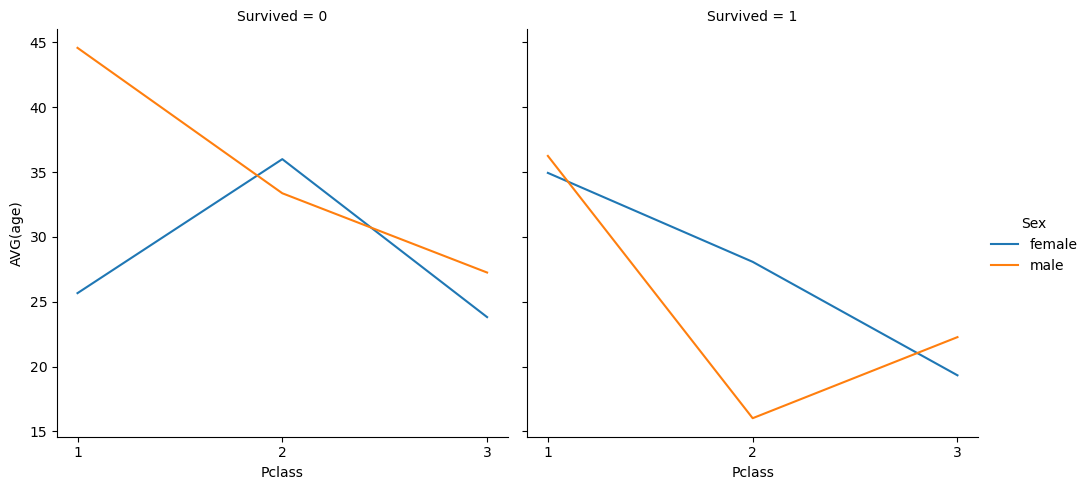

In [40]:
table = pd.read_sql("SELECT  PClass, Sex, survived,AVG(age) FROM titanic GROUP BY PClass, Sex, survived", conn)
sns.relplot(kind = 'line', data = table, x = 'Pclass', y = 'AVG(age)', hue = 'Sex', col = 'Survived')

###  d.What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

In [41]:
curs.execute("""SELECT Name, Age, Sex, Pclass 
FROM titanic 
WHERE age IS NOT NULL AND Survived = 0 
ORDER BY CAST(age AS INSIGNED) DESC 
LIMIT 5""")
curs.fetchall()

[('Svensson, Mr. Johan', '74', 'male', '3'),
 ('Goldschmidt, Mr. George B', '71', 'male', '1'),
 ('Artagaveytia, Mr. Ramon', '71', 'male', '1'),
 ('Connors, Mr. Patrick', '70.5', 'male', '3'),
 ('Mitchell, Mr. Henry Michael', '70', 'male', '2')]

In [44]:
curs.execute("""SELECT Name,Age, Sex, Pclass 
FROM titanic 
WHERE age IS NOT NULL AND Survived = 0 
ORDER BY CAST(age AS INSIGNED) ASC 
LIMIT 5""")
curs.fetchall()

[('Panula, Master. Eino Viljami', '1', 'male', '3'),
 ('Goodwin, Master. Sidney Leonard', '1', 'male', '3'),
 ('Palsson, Master. Gosta Leonard', '2', 'male', '3'),
 ('Rice, Master. Eugene', '2', 'male', '3'),
 ('Andersson, Miss. Ellis Anna Maria', '2', 'female', '3')]

### e. On average which Passenger Class is more expensive?

In [43]:
curs.execute("""SELECT Pclass, AVG(Fare) 
             FROM titanic 
             GROUP BY Pclass 
             ORDER BY avg(fare) DESC 
             LIMIT 1 """)
curs.fetchall()

[('1', 84.15468749999992)]